In [1]:
#import the libraries
import os
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
#import standard scaler
from sklearn.preprocessing import StandardScaler
#import the PCA function
from sklearn.decomposition import PCA

In [3]:
#set the working directory
os.chdir('/Users/rossbrancati/Desktop/PFP_Project/kinetic_kinematic/Data/metric_matrices/individual_means/all_groups')
data_directory = os.path.join(os.getcwd())
directory = sorted(os.listdir(data_directory))
#directory.remove('.DS_Store')
print(directory)

['ankle_angle_x.txt', 'ankle_angle_y.txt', 'ankle_angle_z.txt', 'ankle_moment_x.txt', 'ankle_moment_y.txt', 'ankle_moment_z.txt', 'hip_angle_x.txt', 'hip_angle_y.txt', 'hip_angle_z.txt', 'hip_moment_x.txt', 'hip_moment_y.txt', 'hip_moment_z.txt', 'knee_angle_x.txt', 'knee_angle_y.txt', 'knee_angle_z.txt', 'knee_moment_x.txt', 'knee_moment_y.txt', 'knee_moment_z.txt']


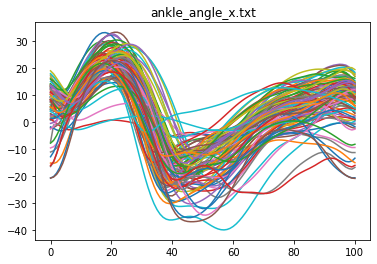

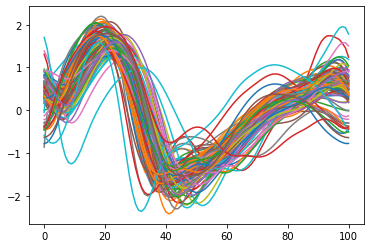

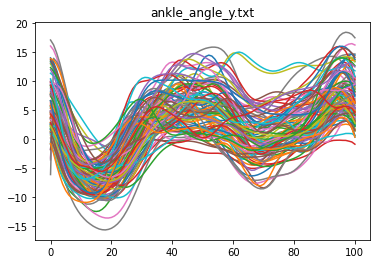

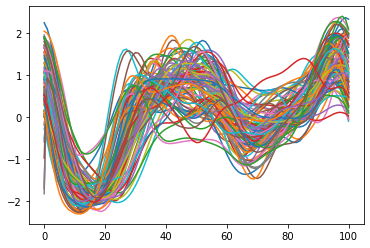

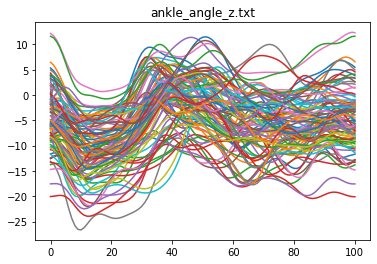

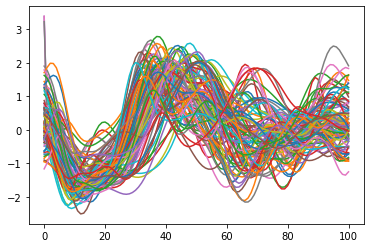

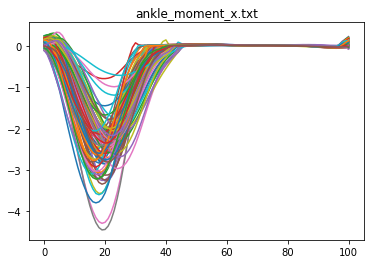

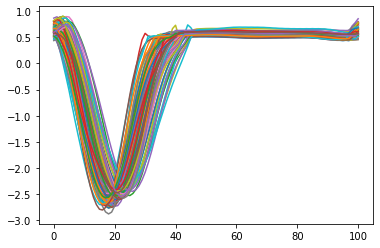

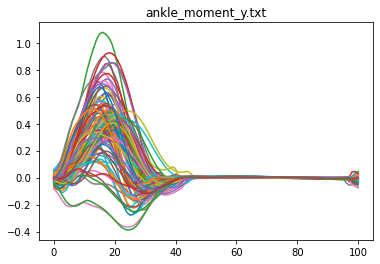

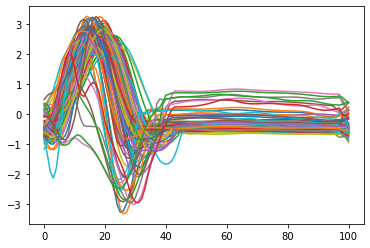

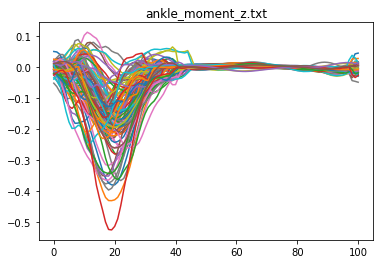

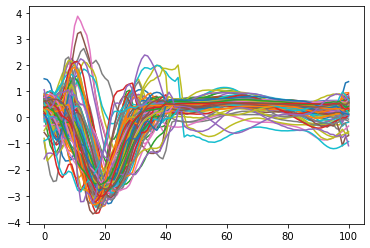

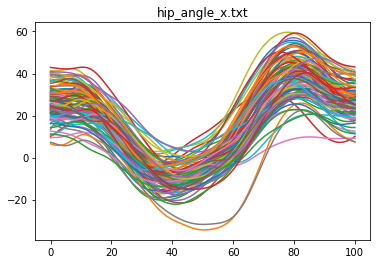

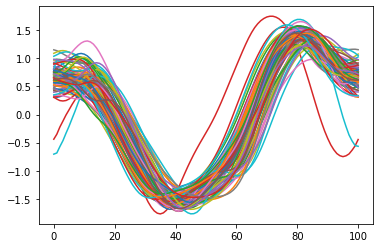

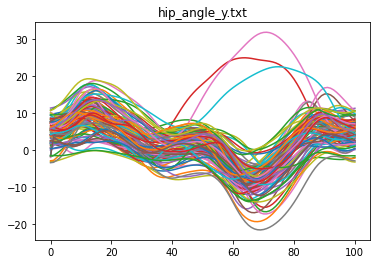

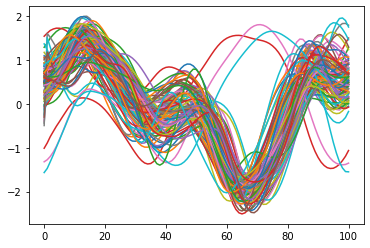

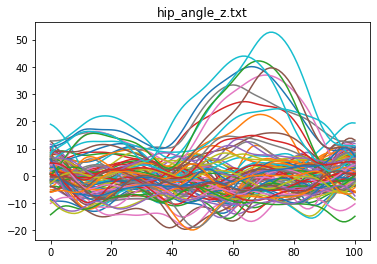

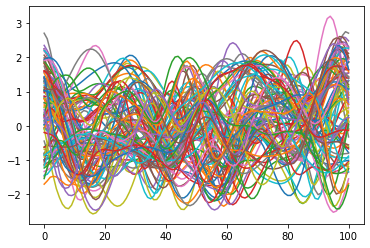

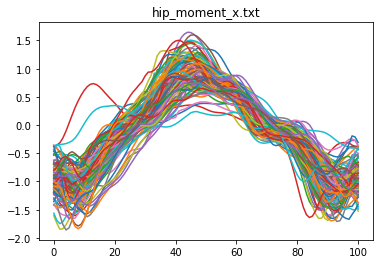

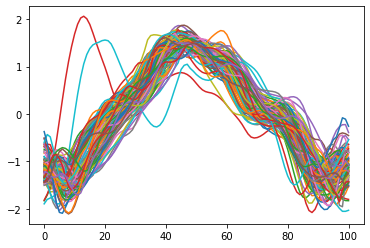

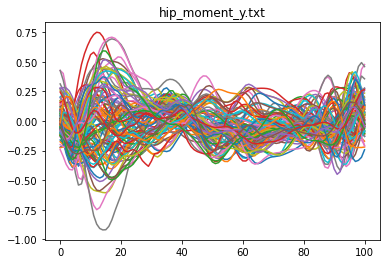

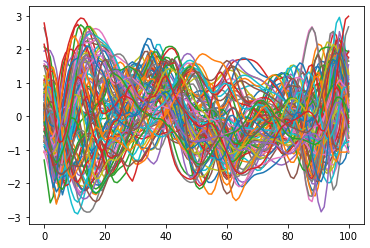

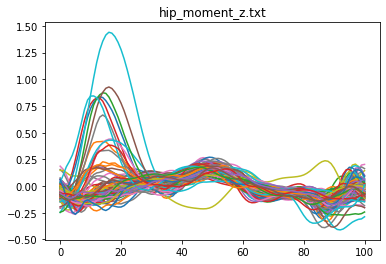

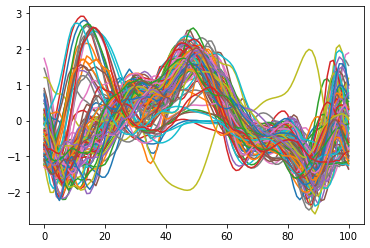

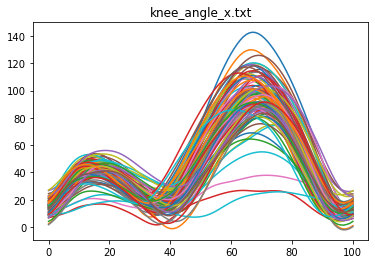

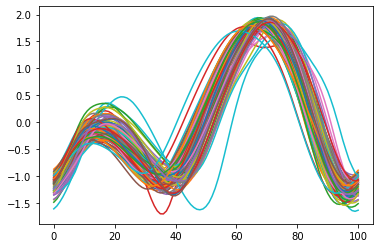

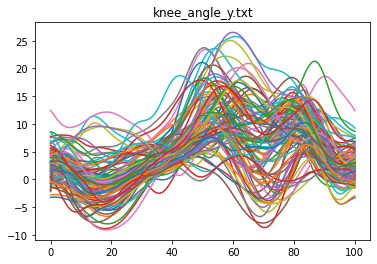

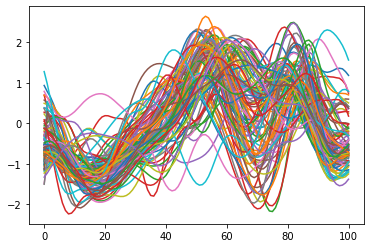

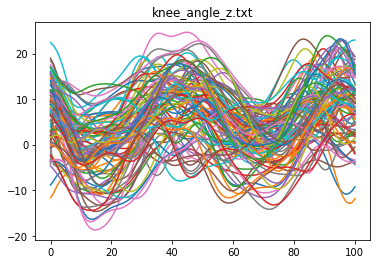

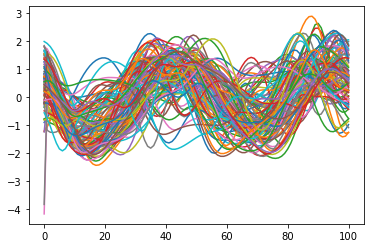

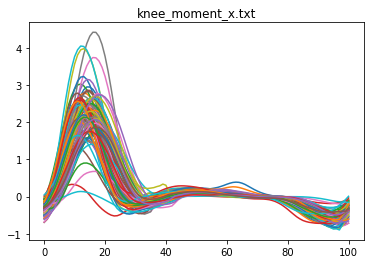

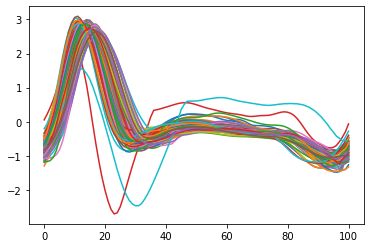

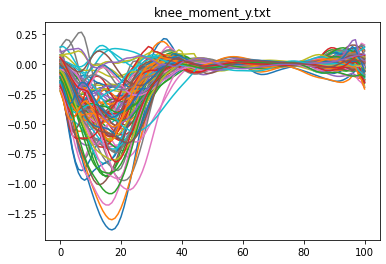

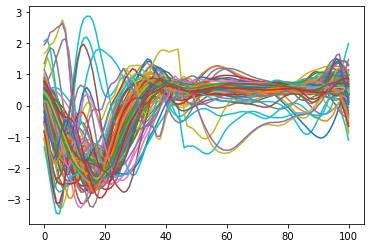

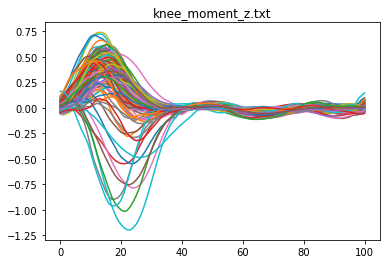

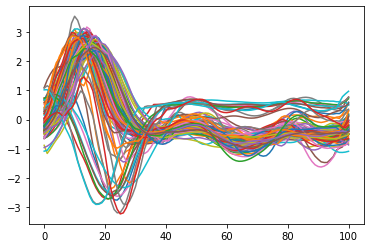

In [5]:
for file_idx,file_name in enumerate(directory):

    file_path = os.path.join(data_directory,file_name)
    
    #load the file
    raw_file = pd.read_csv(file_path,sep='\t',header=None)
    num_rows,num_cols = raw_file.shape
    cols = list(raw_file.columns)
    
    for row in range(num_rows):
        plt.plot(raw_file.iloc[row,:])
        
    plt.title(file_name)    
    plt.show()
    
    #transpose the raw_file for correct orientation for z-score function
    raw_file = raw_file.T
    
    #apply standard scaler (z-transform) to each column, where each column now represents a waveform of the particular matrix
    scaler = StandardScaler()
    raw_file_transform = scaler.fit_transform(raw_file)
    
    #transpose matrix back to original orientation
    #each row represnts a waveform now
    raw_file_transform = raw_file_transform.T
    
    for row in range(num_rows):
        plt.plot(raw_file_transform[row,:])
        
    plt.show()
    
    np.savetxt('/Users/rossbrancati/Desktop/PFP_Project/kinetic_kinematic/Data/metric_matrices/individual_means/all_groups_z_transform/'+file_name, raw_file_transform, 
               delimiter='\t', fmt='%f')

In [9]:
test = pd.read_csv('/Users/rossbrancati/Desktop/PFP_Project/kinetic_kinematic/Data/metric_matrices/all_groups/hip_moment_z.txt', sep='\t',header=None)

In [14]:
for rows in range(len(test)):
    if test.iloc[rows,40] < (-0.15):
        print(rows)

464
465
466
467
468
469
470
471
472
473
474
476
477


In [16]:
rows = 0
test.iloc[464,1]

0.12242

In [13]:
if test.iloc[rows,40] < (-0.15):
        print(rows)